In [1]:
%matplotlib inline
import numpy as np
import scipy.spatial.distance as distance
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from random import random
import scipy.spatial.distance as distance
import seaborn as sns
import pandas as pd
from rdkit import rdBase, Chem
from rdkit.Chem import AllChem, Draw
import s3fs

PATH_TRAIN = "../data/results/train.txt"
PATH_TEST = "../data/results/test.txt"
TRAIN_DATA_SIZE = 3780
SIZE = 20

In [2]:
train= pd.read_table(PATH_TRAIN, sep=' ', header=None).values
test = pd.read_table(PATH_TEST, sep=' ', header=None).values
data = np.concatenate([train, test])

In [3]:
data = np.concatenate([train, test])

In [3]:
cluster_train = linkage(data, metric='cosine', method='average')

#_=dendrogram(cluster_train)

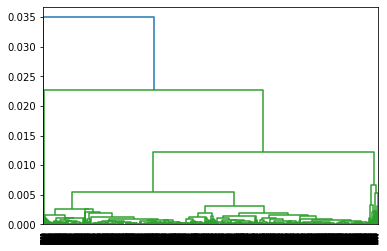

In [10]:
_=dendrogram(cluster_train)

In [4]:
clusters = fcluster(cluster_train, t=SIZE, criterion='maxclust')

In [5]:
df = pd.read_csv('../data/molecule.csv')
df['mols'] = [Chem.MolFromSmiles(j) for j in df['smiles'].values]
df['clusters'] = clusters

In [6]:
df_test = df[TRAIN_DATA_SIZE:]
df_train = df[:TRAIN_DATA_SIZE]

cluster 1


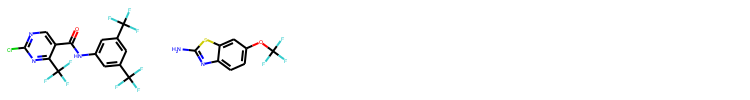

cluster 2


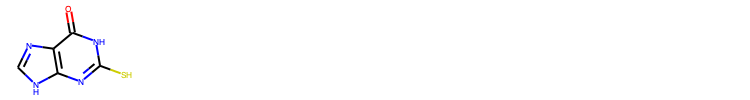

cluster 3


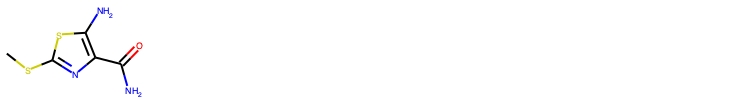

cluster 4


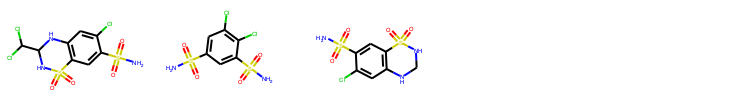

cluster 5


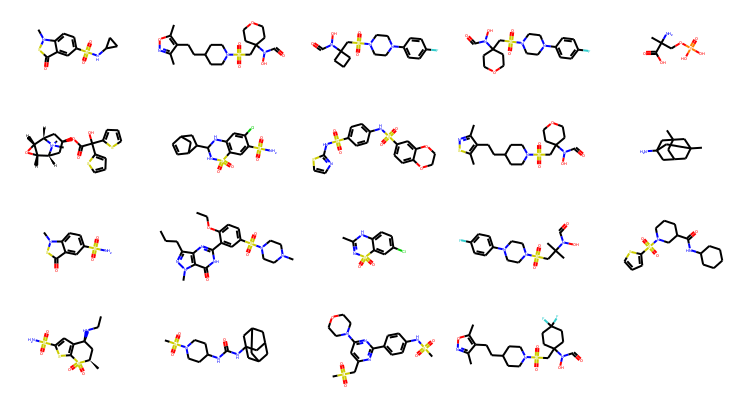

cluster 6


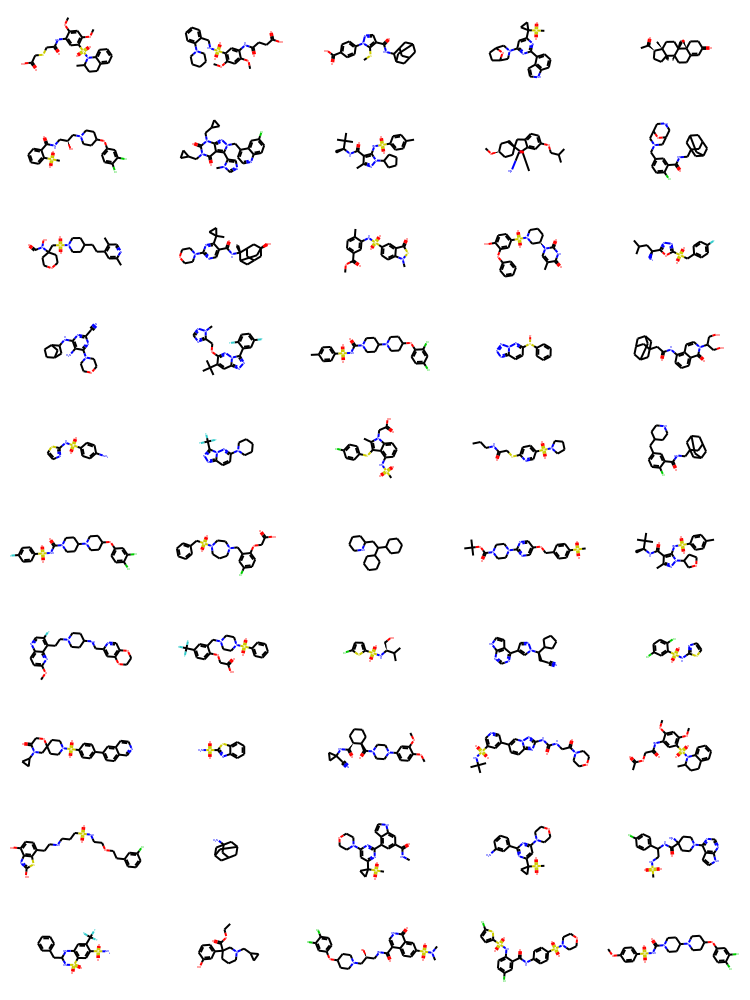

cluster 7


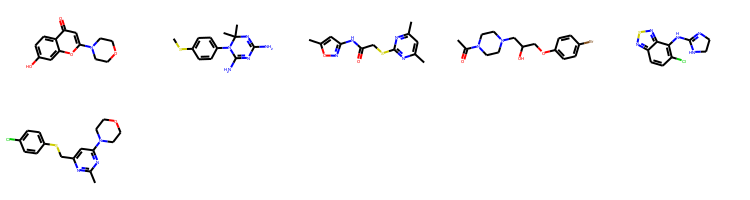

cluster 8


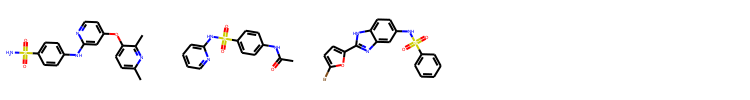

cluster 9


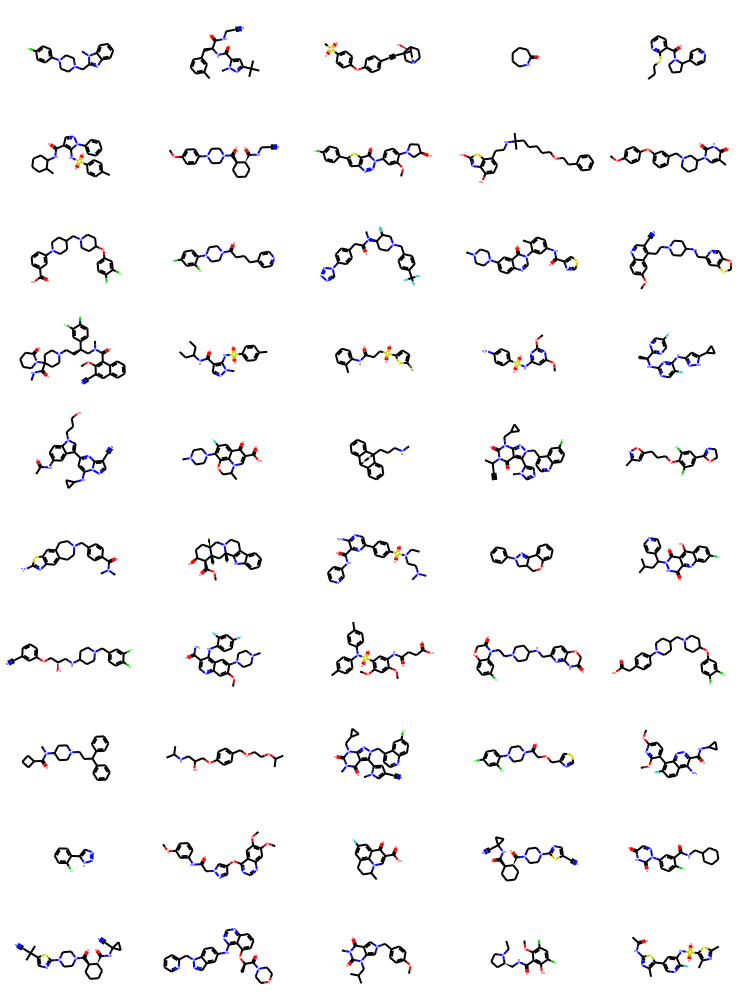

cluster 10


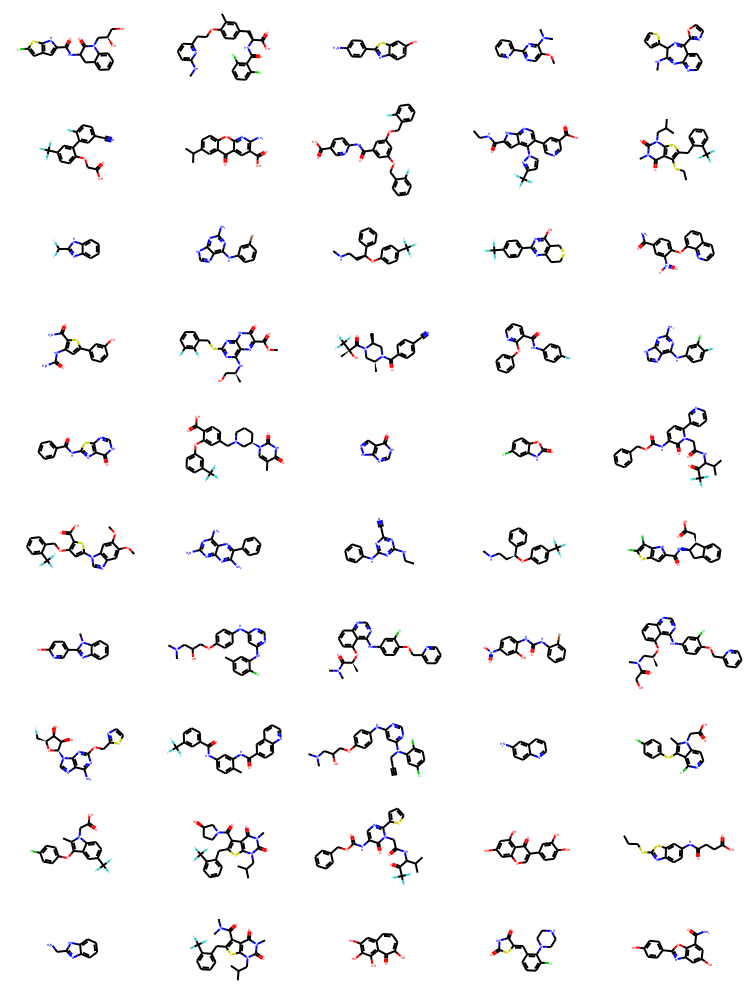

cluster 11


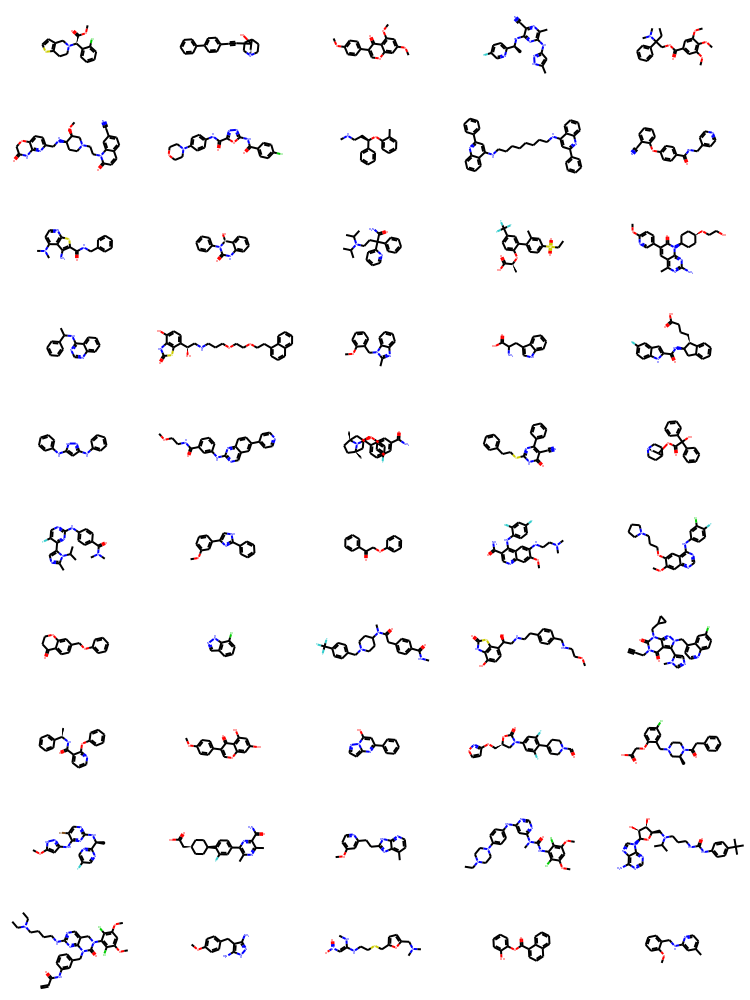

cluster 12


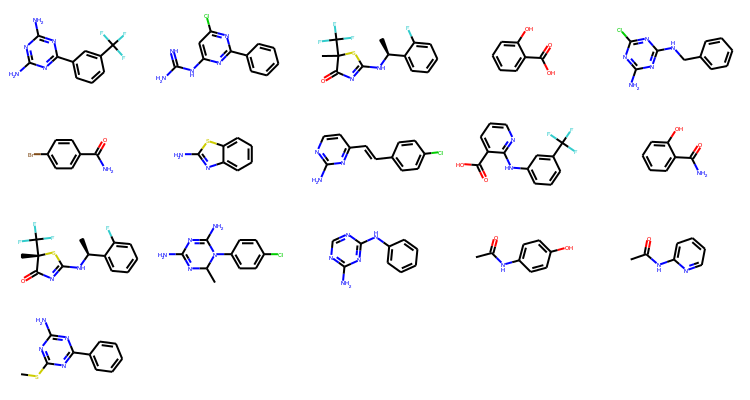

cluster 13


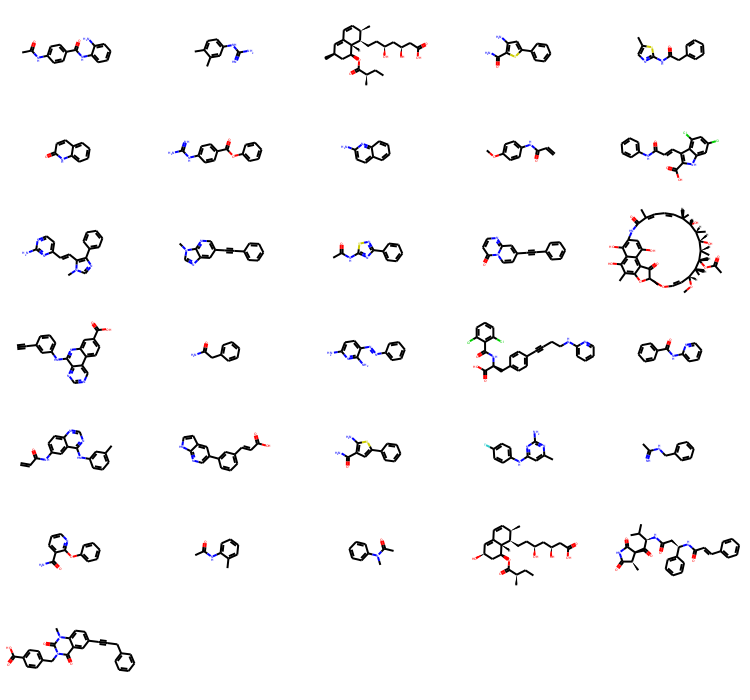

cluster 14


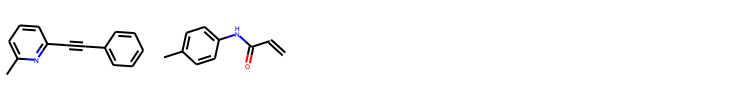

cluster 15


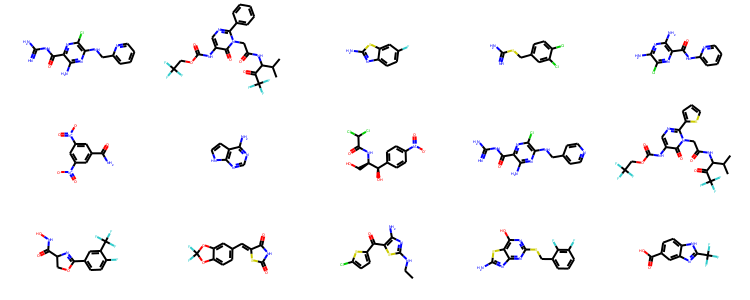

cluster 16


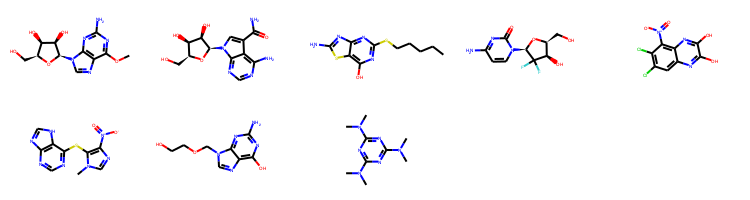

cluster 17


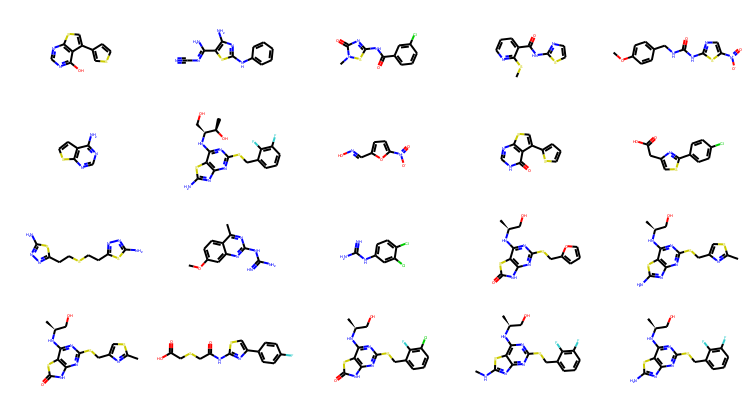

cluster 18
cluster 19


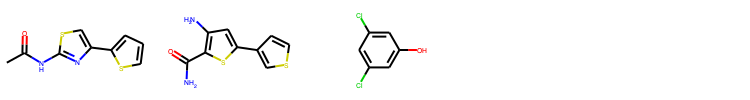

cluster 20


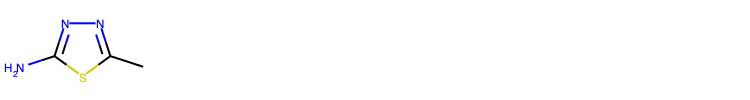

In [8]:
for cluster_number in range(SIZE):
    index = cluster_number + 1
    print('cluster', index)
    temp = df_train['mols'].loc[
        df_train['clusters']==index]
    if len(temp)==0:
        continue
    img = Draw.MolsToGridImage(temp.values, molsPerRow=5, subImgSize=(150,100))
    display(img)

cluster 1
cluster 2
cluster 3
cluster 4
cluster 5
cluster 6


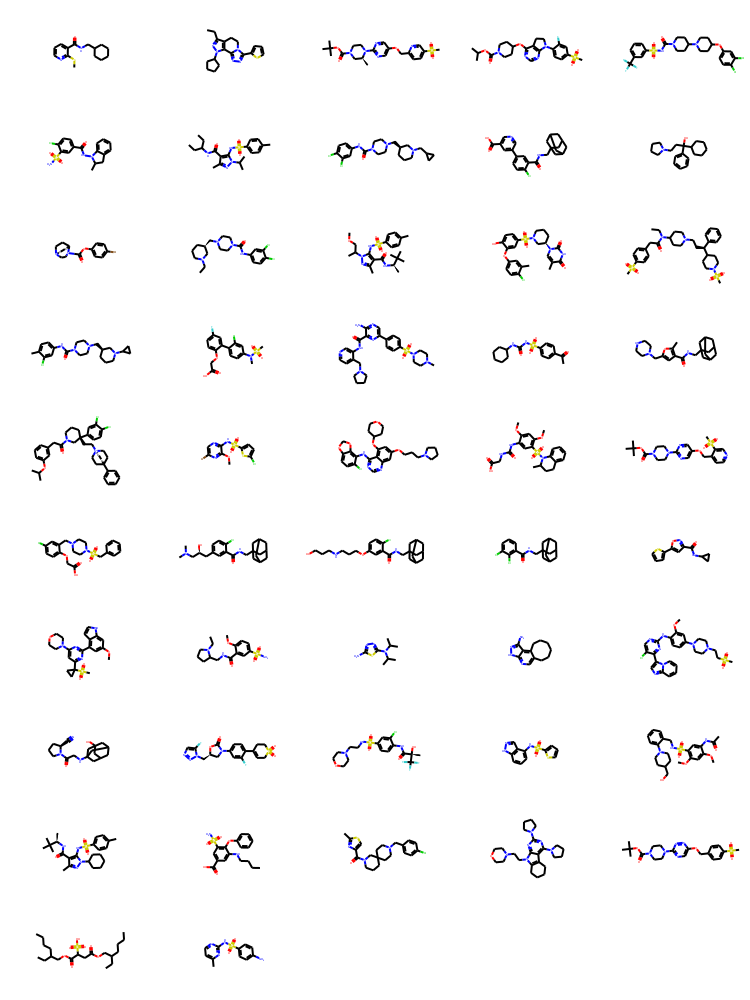

cluster 7
cluster 8


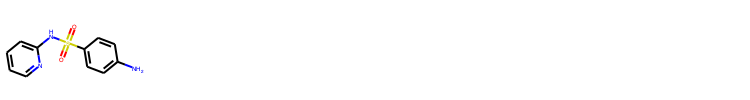

cluster 9


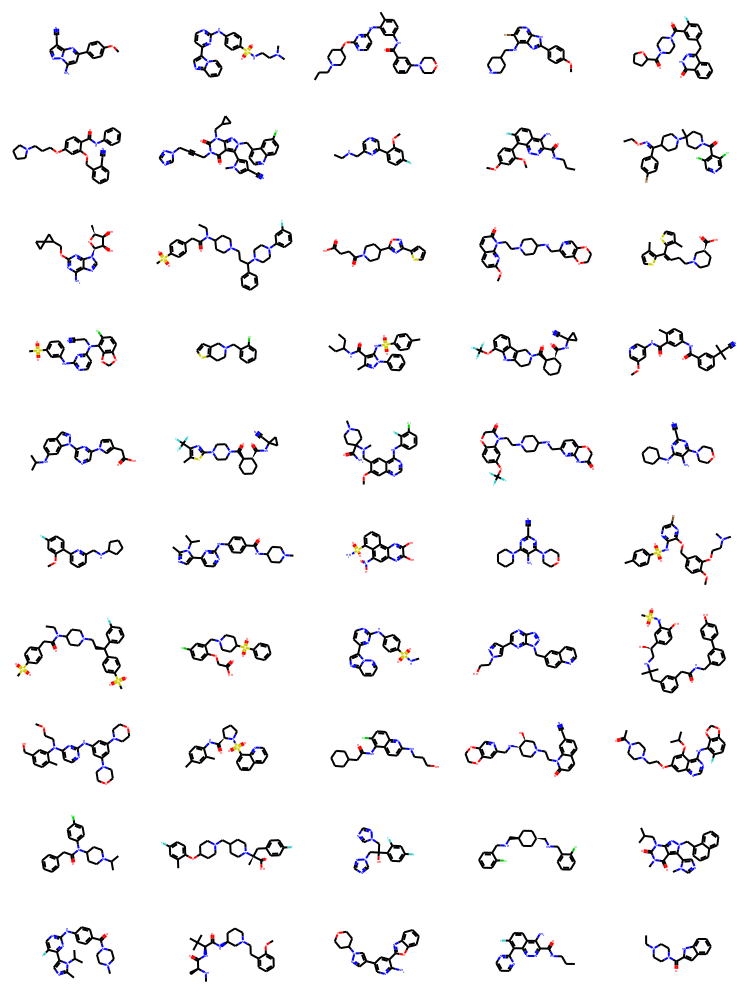

cluster 10


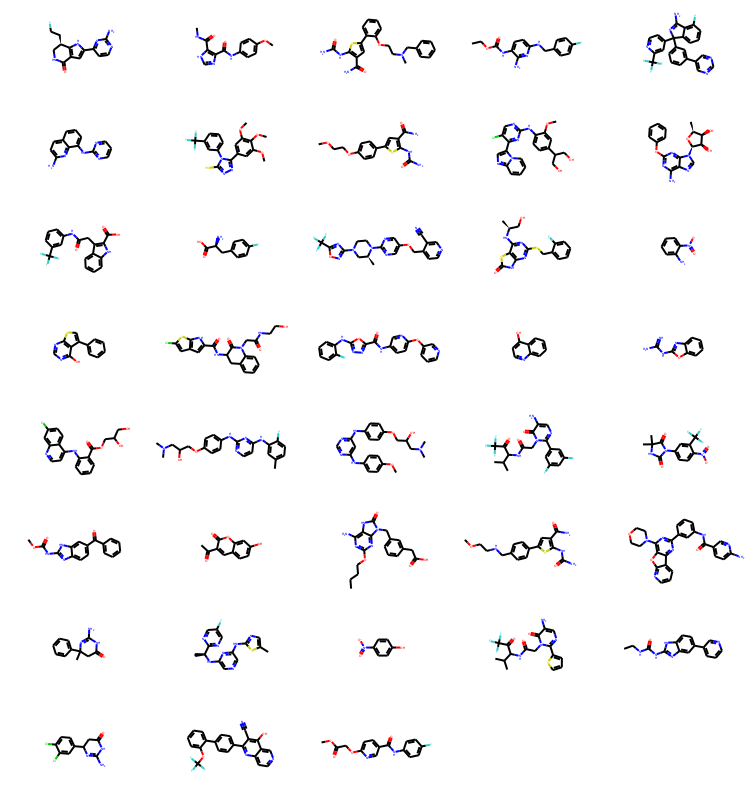

cluster 11


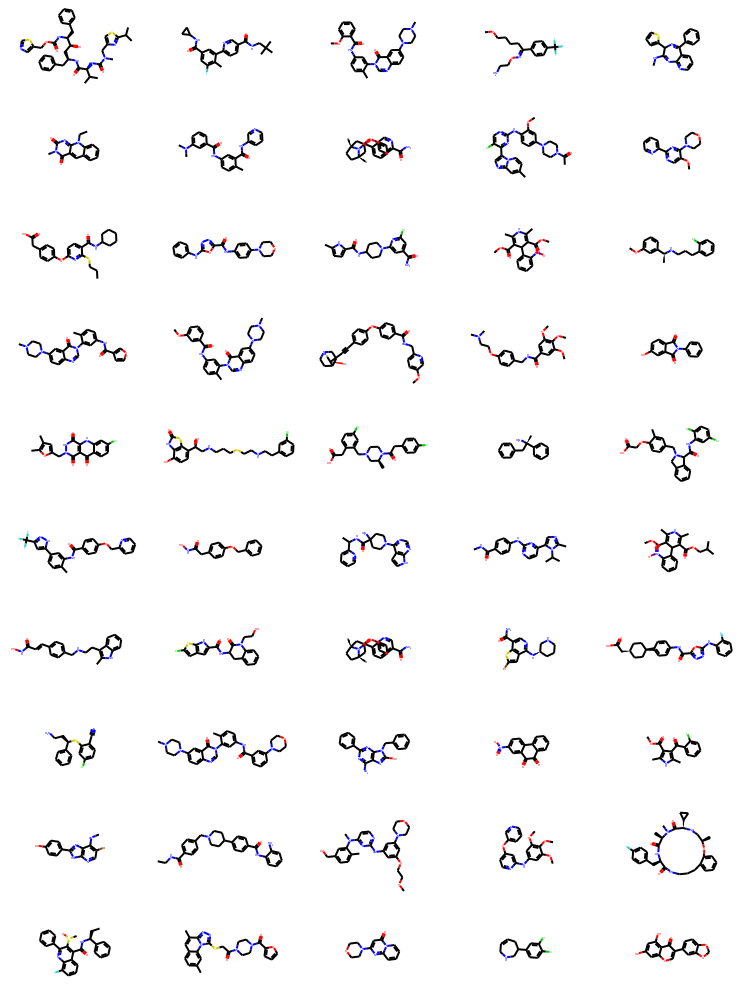

cluster 12


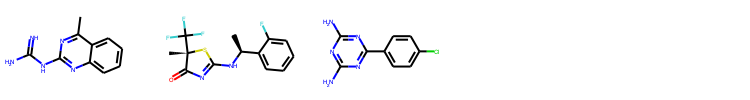

cluster 13


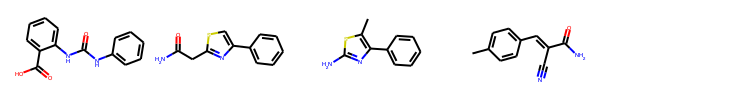

cluster 14


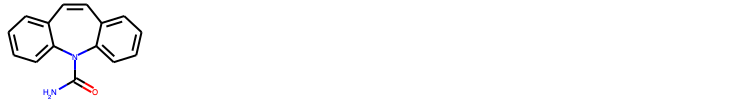

cluster 15
cluster 16


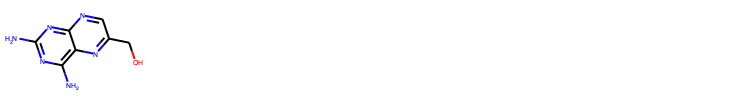

cluster 17


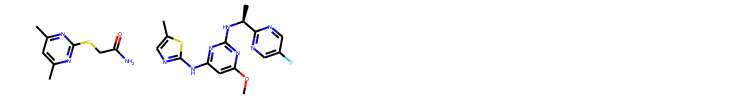

cluster 18


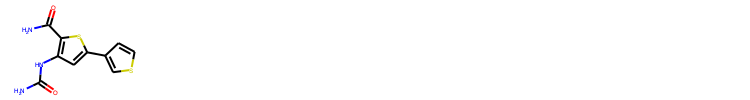

cluster 19
cluster 20


In [11]:
for cluster_number in range(SIZE):
    index = cluster_number + 1
    print('cluster', index)
    temp = df_test['mols'].loc[
        df_test['clusters']==index]
    if len(temp)==0:
        continue
    img = Draw.MolsToGridImage(temp.values, molsPerRow=5, subImgSize=(150,100))
    display(img)